**2. Sonar**
---

In [6]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [7]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion

In [8]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [9]:
# Reading the dataset and creating the dataframe
sonar = loadmat('Datasets.mat/Sonar_208x60_binary.mat')

df = pd.DataFrame(sonar.get('X'))
df['y'] = sonar.get('y').ravel()

In [10]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
77,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235,0.0842,...,0.0150,0.0111,0.0032,0.0035,0.0169,0.0137,0.0015,0.0069,0.0051,1
27,0.0177,0.0300,0.0288,0.0394,0.0630,0.0526,0.0688,0.0633,0.0624,0.0613,...,0.0102,0.0122,0.0044,0.0075,0.0124,0.0099,0.0057,0.0032,0.0019,1
177,0.0201,0.0165,0.0344,0.0330,0.0397,0.0443,0.0684,0.0903,0.1739,0.2571,...,0.0054,0.0057,0.0137,0.0109,0.0035,0.0056,0.0105,0.0082,0.0036,2
16,0.0352,0.0116,0.0191,0.0469,0.0737,0.1185,0.1683,0.1541,0.1466,0.2912,...,0.0346,0.0158,0.0154,0.0109,0.0048,0.0095,0.0015,0.0073,0.0067,1
43,0.0093,0.0269,0.0217,0.0339,0.0305,0.1172,0.1450,0.0638,0.0740,0.1360,...,0.0212,0.0091,0.0056,0.0086,0.0092,0.0070,0.0116,0.0060,0.0110,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 77 to 115
Data columns (total 61 columns):
0     166 non-null float64
1     166 non-null float64
2     166 non-null float64
3     166 non-null float64
4     166 non-null float64
5     166 non-null float64
6     166 non-null float64
7     166 non-null float64
8     166 non-null float64
9     166 non-null float64
10    166 non-null float64
11    166 non-null float64
12    166 non-null float64
13    166 non-null float64
14    166 non-null float64
15    166 non-null float64
16    166 non-null float64
17    166 non-null float64
18    166 non-null float64
19    166 non-null float64
20    166 non-null float64
21    166 non-null float64
22    166 non-null float64
23    166 non-null float64
24    166 non-null float64
25    166 non-null float64
26    166 non-null float64
27    166 non-null float64
28    166 non-null float64
29    166 non-null float64
30    166 non-null float64
31    166 non-null float64
32    166 non-null float64
33 

In [13]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,y
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,...,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.030013,0.038173,0.043593,0.053824,0.076578,0.105449,0.123998,0.137678,0.180273,0.212496,...,0.013425,0.010690,0.011149,0.009067,0.008440,0.007651,0.007983,0.008023,0.006539,1.536145
std,0.022982,0.030493,0.034795,0.040499,0.051654,0.060144,0.062307,0.083436,0.118193,0.131840,...,0.009900,0.007290,0.007360,0.006972,0.005926,0.005727,0.006740,0.006117,0.005207,0.500201
min,0.001500,0.000600,0.001500,0.006100,0.006700,0.010200,0.013000,0.012400,0.007500,0.011300,...,0.001300,0.000500,0.001000,0.001100,0.000600,0.000700,0.000300,0.000500,0.000600,1.000000
25%,0.015125,0.016525,0.020300,0.024775,0.040475,0.068400,0.085400,0.087850,0.097775,0.123550,...,0.007450,0.004900,0.005625,0.004300,0.004400,0.003700,0.003600,0.004300,0.003100,1.000000
50%,0.023100,0.030850,0.034300,0.044050,0.064650,0.092250,0.110800,0.113000,0.159350,0.185600,...,0.010900,0.009450,0.009600,0.007500,0.006950,0.005750,0.005850,0.006750,0.005300,2.000000
75%,0.036575,0.047775,0.057600,0.068700,0.106850,0.140050,0.153375,0.169350,0.232150,0.266600,...,0.016650,0.014675,0.014425,0.011925,0.011325,0.009900,0.010175,0.010375,0.008675,2.000000
max,0.137100,0.163200,0.199700,0.260400,0.322500,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,2.000000


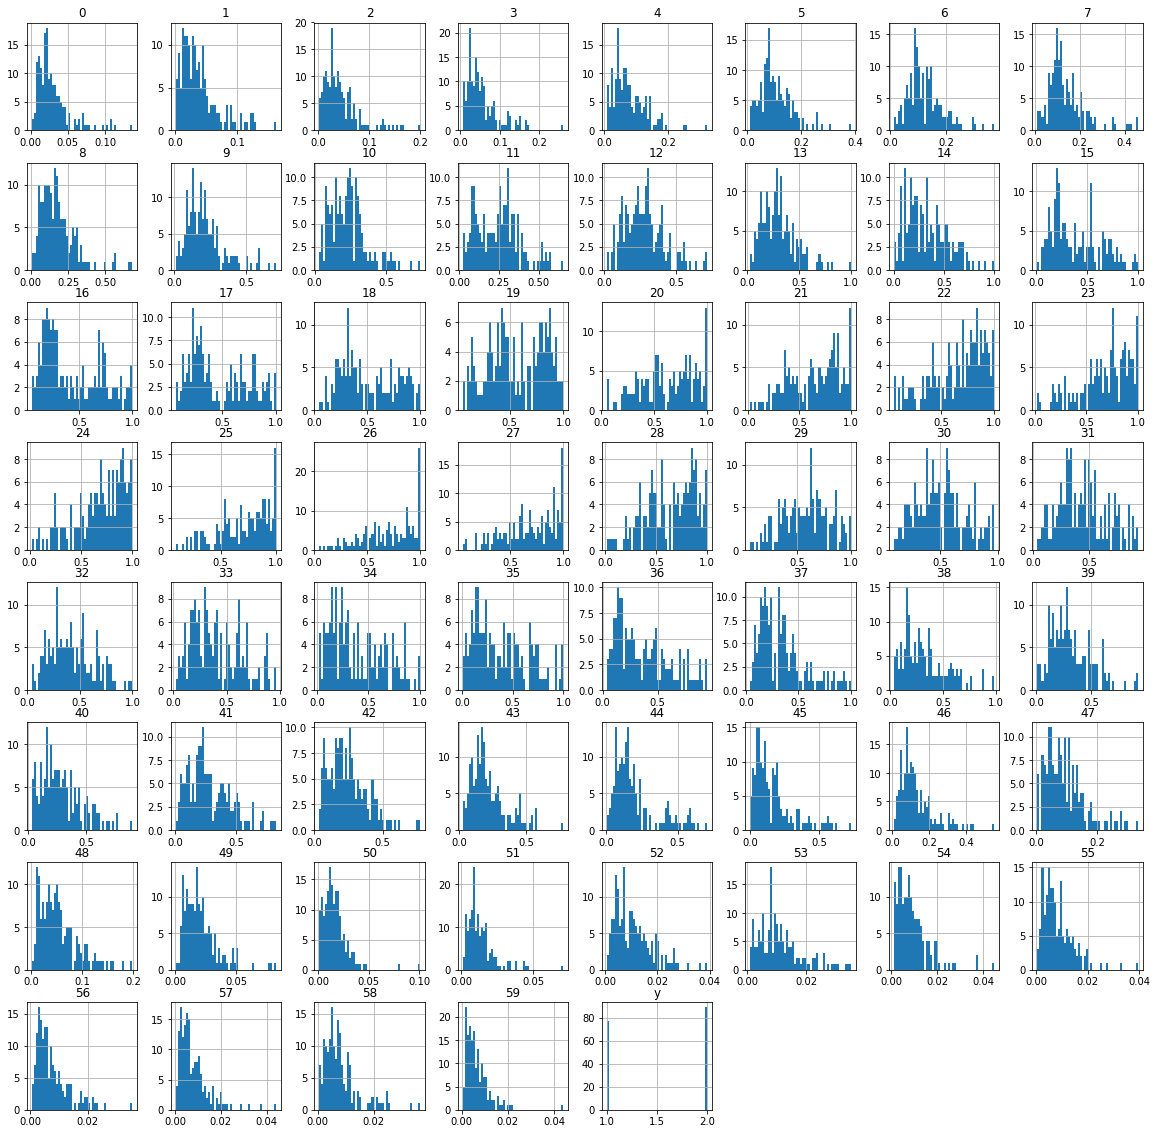

In [14]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

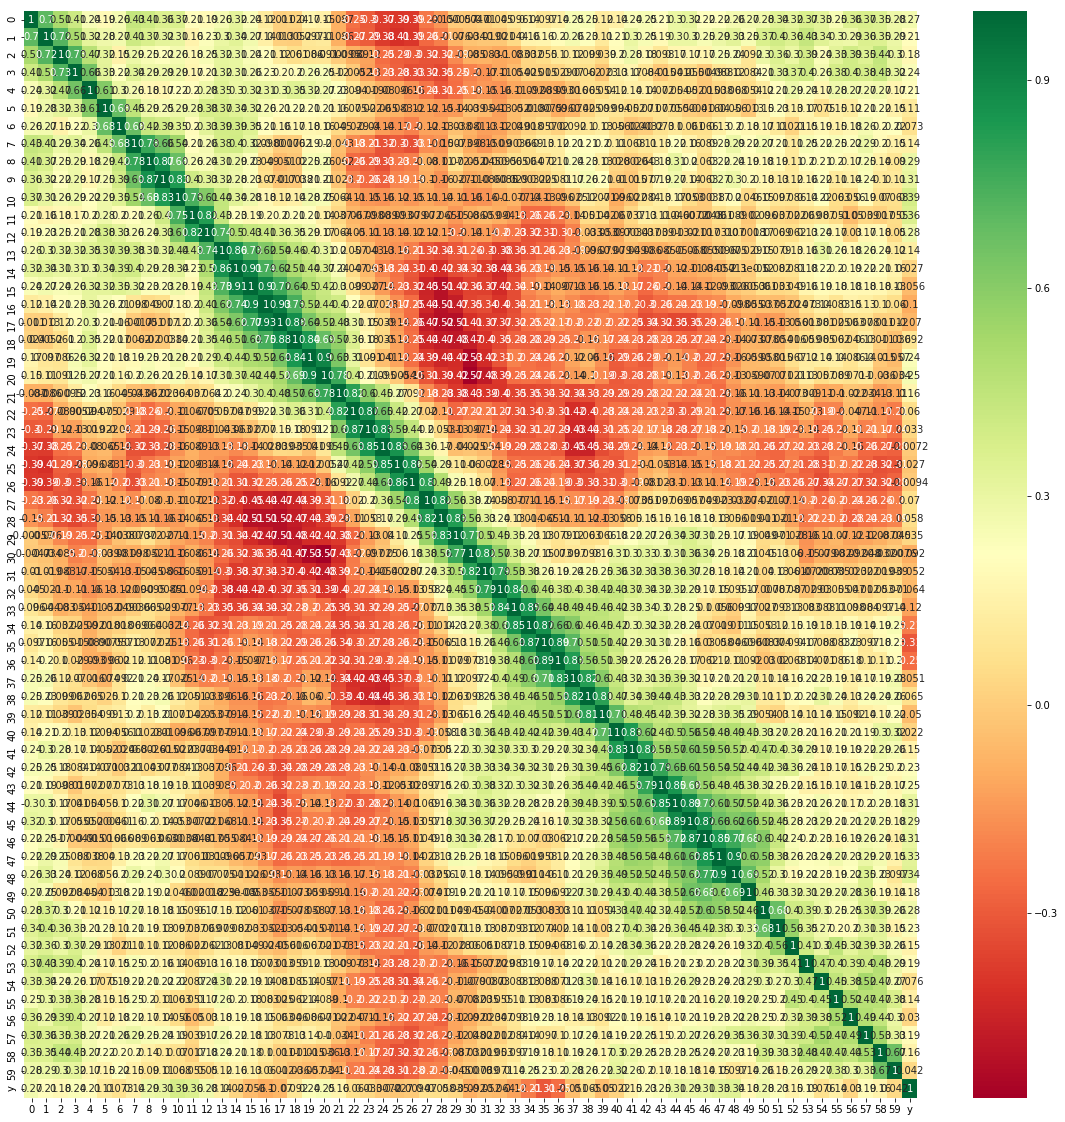

In [15]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [16]:
corrmat['y'].sort_values(ascending=True)

35   -0.305144
36   -0.252152
34   -0.214885
33   -0.120507
16   -0.101546
30   -0.091578
17   -0.070342
32   -0.063853
15   -0.056144
31   -0.051857
37   -0.050816
39   -0.050272
25   -0.027067
26   -0.009427
24   -0.007237
40    0.021604
14    0.026995
56    0.030459
23    0.033375
29    0.034770
59    0.041583
28    0.057614
22    0.060177
38    0.065381
27    0.069697
6     0.072955
54    0.075766
18    0.092393
5     0.110269
13    0.136161
        ...   
55    0.141403
52    0.150514
41    0.151555
58    0.156309
21    0.164756
49    0.181698
2     0.184934
57    0.192883
53    0.193610
4     0.205171
1     0.209627
42    0.225048
51    0.231122
19    0.235335
3     0.239270
43    0.245590
20    0.253903
0     0.266810
12    0.278992
50    0.282274
8     0.291184
45    0.291278
46    0.306684
9     0.310516
44    0.311038
47    0.329019
48    0.340055
11    0.358705
10    0.386141
y     1.000000
Name: y, Length: 61, dtype: float64

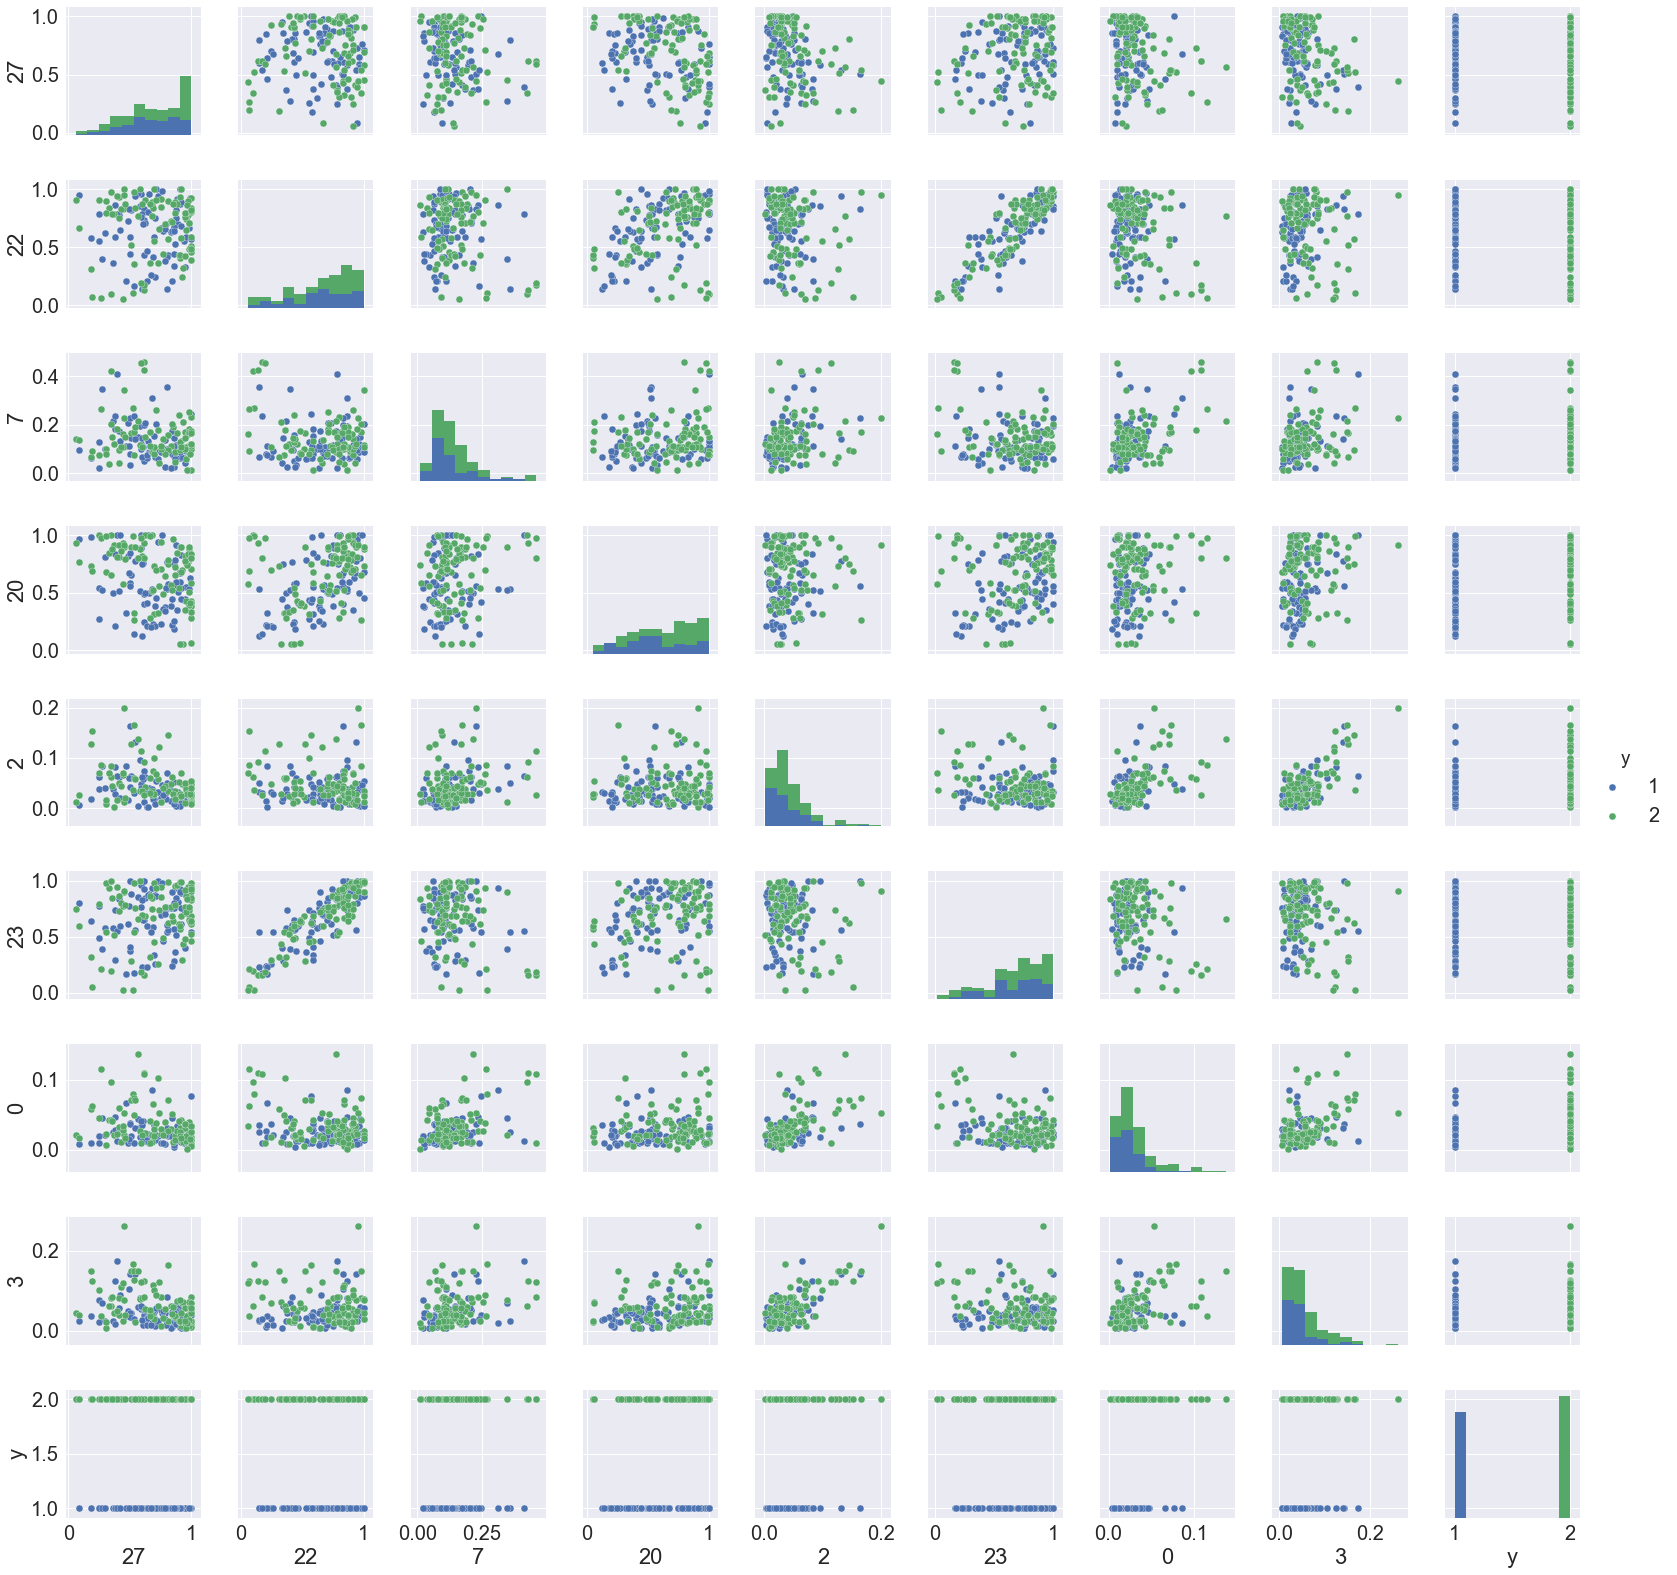

In [17]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df[[27,22, 7,20,2,23,0,3,'y']], hue='y')

In [18]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

2    0.536145
1    0.463855
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [19]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [20]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.639 (+/- 0.060)
The IQR is 0.020 between [0.65,0.67]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.58      0.81      0.67       770
         2.0       0.75      0.49      0.59       890

    accuracy                           0.64      1660
   macro avg       0.66      0.65      0.63      1660
weighted avg       0.67      0.64      0.63      1660

The average training time is 0.003079 seconds


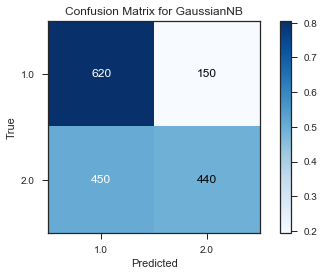

In [26]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), np.array(df['y']), classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.79
              precision    recall  f1-score   support

           1       0.95      0.70      0.81        27
           2       0.64      0.93      0.76        15

    accuracy                           0.79        42
   macro avg       0.79      0.82      0.78        42
weighted avg       0.84      0.79      0.79        42



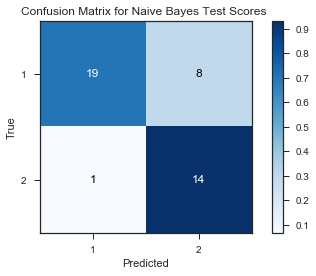

In [22]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.742 (+/- 0.075)
The IQR is 0.118 between [0.71,0.82]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.76      0.65      0.70       770
         2.0       0.73      0.82      0.77       890

    accuracy                           0.74      1660
   macro avg       0.74      0.73      0.74      1660
weighted avg       0.74      0.74      0.74      1660

The average training time is 0.004783 seconds


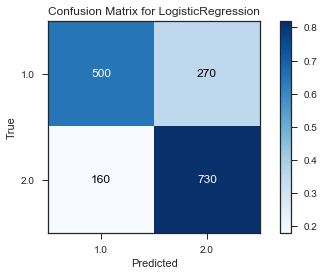

In [23]:
val_conf_LR, val_scores_LR, val_time_LR = classify(df.drop('y',axis=1), df['y'],
                                              classifiers['Logistic Regression'](solver='liblinear'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

The test accuracy is 0.71
              precision    recall  f1-score   support

           1       0.60      0.75      0.67        16
           2       0.82      0.69      0.75        26

    accuracy                           0.71        42
   macro avg       0.71      0.72      0.71        42
weighted avg       0.74      0.71      0.72        42



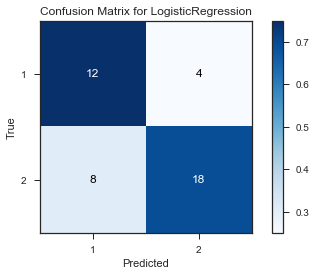

In [24]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear')
LR.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(df_test.drop('y',axis=1))
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.825 (+/- 0.102)
The IQR is 0.176 between [0.71,0.88]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.83      0.77      0.80       770
         2.0       0.81      0.87      0.84       890

    accuracy                           0.82      1660
   macro avg       0.82      0.82      0.82      1660
weighted avg       0.82      0.82      0.82      1660

The average training time is 0.796705 seconds


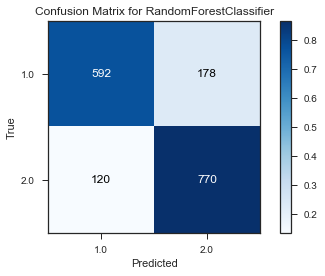

In [27]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],classifiers['RF'](n_estimators = 500))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 0.93
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        17
           2       1.00      0.88      0.94        25

    accuracy                           0.93        42
   macro avg       0.93      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42



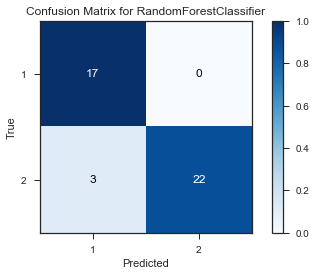

In [28]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.806 (+/- 0.092)
The IQR is 0.118 between [0.76,0.88]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.78      0.81      0.79       770
         2.0       0.83      0.81      0.82       890

    accuracy                           0.81      1660
   macro avg       0.81      0.81      0.81      1660
weighted avg       0.81      0.81      0.81      1660

The average training time is 0.560879 seconds


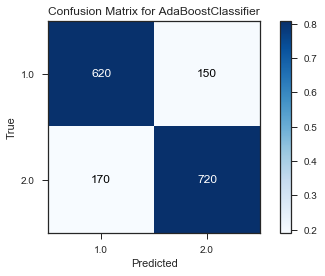

In [29]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), df['y'],
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 0.93
              precision    recall  f1-score   support

           1       0.85      1.00      0.92        17
           2       1.00      0.88      0.94        25

    accuracy                           0.93        42
   macro avg       0.93      0.94      0.93        42
weighted avg       0.94      0.93      0.93        42



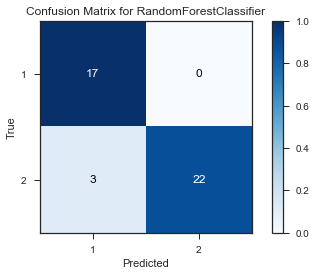

In [30]:
#  Fitting on the training data
Ada = classifiers['RF'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, df_test['y']))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [31]:
np.shape(df['y'])

(166,)

The model score is 0.861 (+/- 0.078)
The IQR is 0.114 between [0.82,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.88      0.82      0.85       770
         2.0       0.85      0.90      0.87       890

    accuracy                           0.86      1660
   macro avg       0.86      0.86      0.86      1660
weighted avg       0.86      0.86      0.86      1660

The model score is 0.854 (+/- 0.077)
The IQR is 0.173 between [0.76,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.83      0.87      0.85       770
         2.0       0.88      0.84      0.86       890

    accuracy                           0.86      1660
   macro avg       0.85      0.86      0.86      1660
weighted avg       0.86      0.86      0.86      1660

The model score is 0.848 (+/- 0.094)
The IQR is 0.176 between [0.76,0.94]
There is 0 deleted rows
              precision    recall  f1-score   suppor

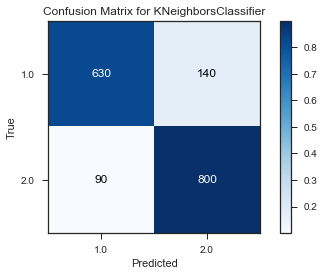

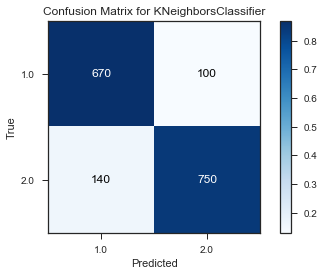

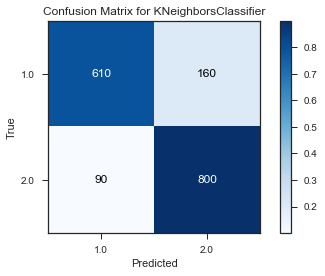

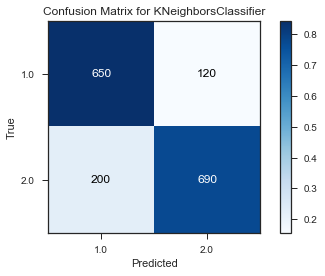

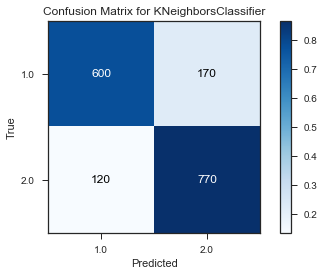

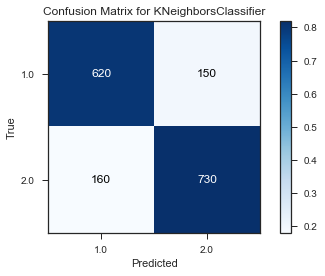

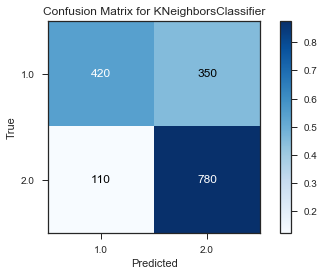

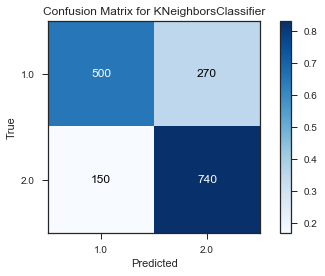

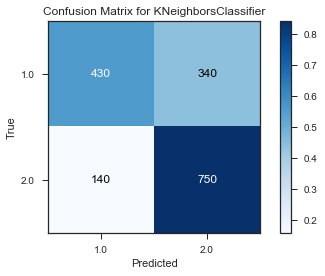

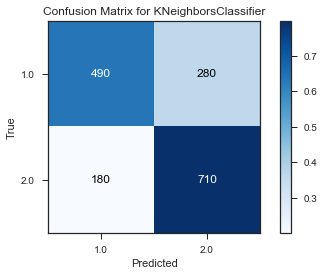

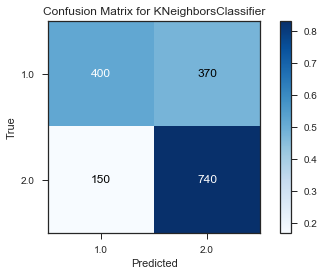

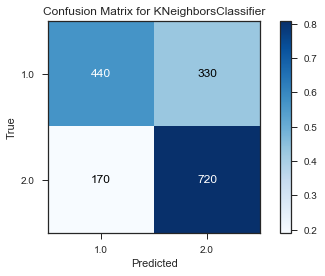

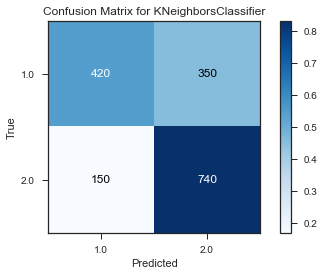

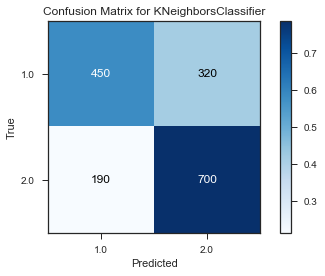

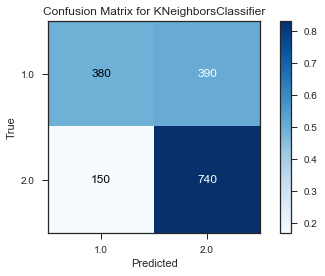

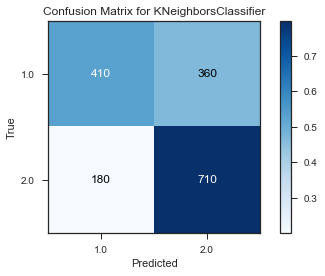

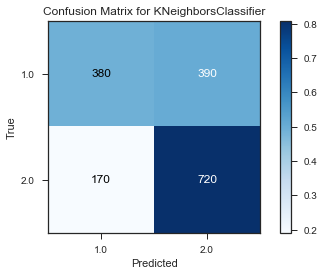

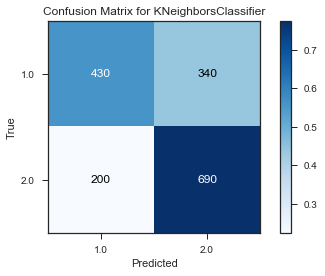

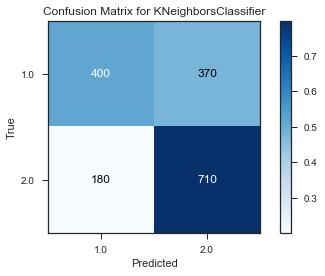

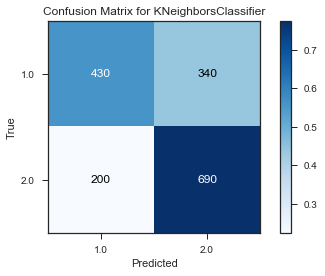

In [32]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

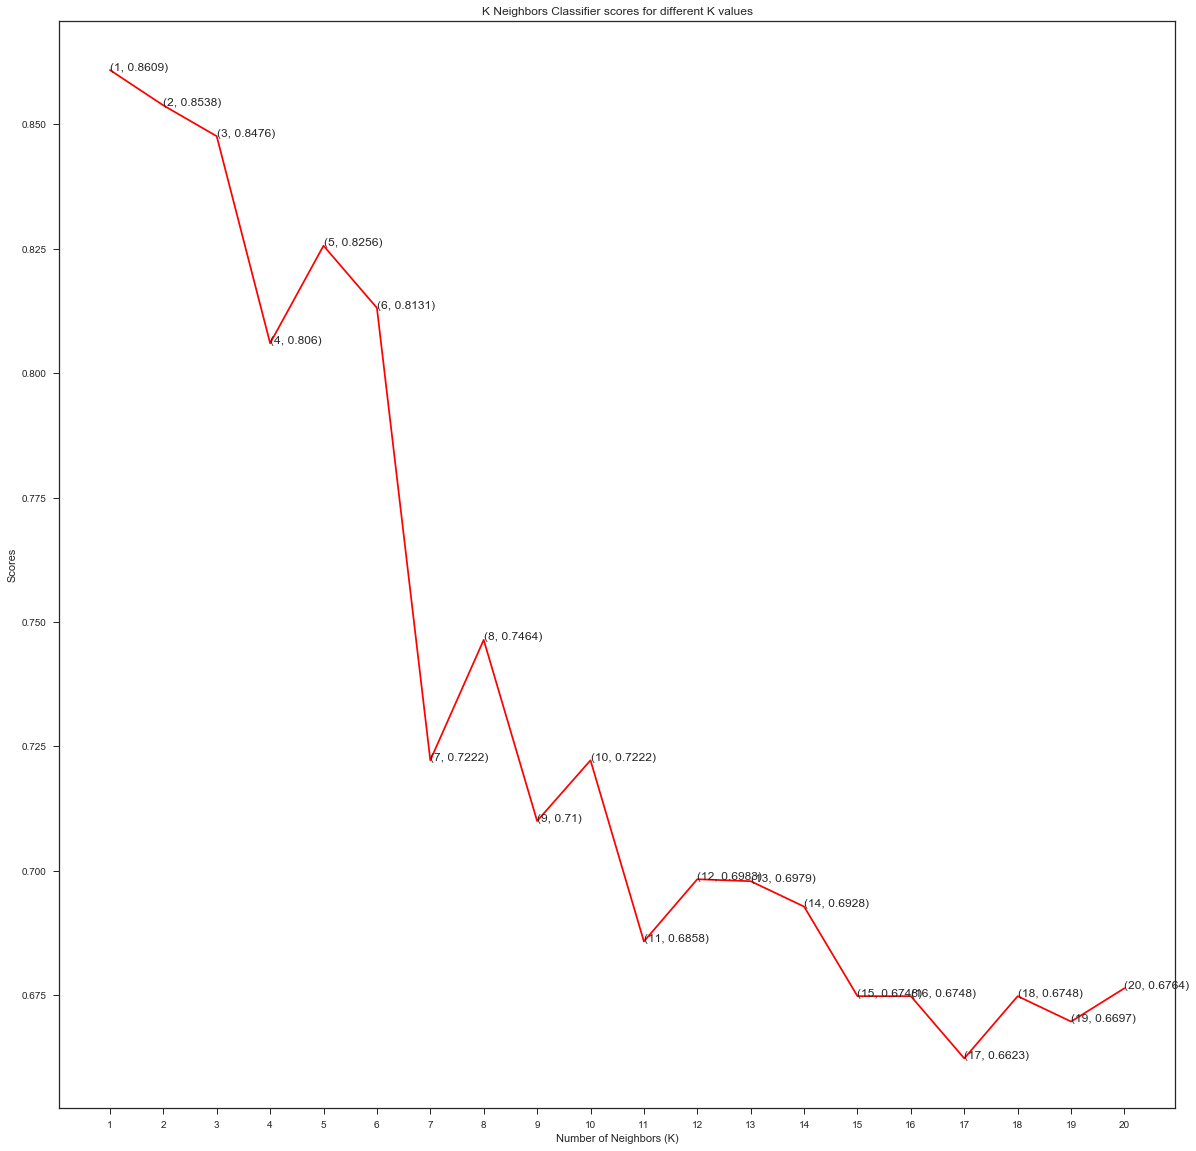

In [33]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.861 (+/- 0.078)
The IQR is 0.114 between [0.82,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.88      0.82      0.85       770
         2.0       0.85      0.90      0.87       890

    accuracy                           0.86      1660
   macro avg       0.86      0.86      0.86      1660
weighted avg       0.86      0.86      0.86      1660

The average training time is 0.002929 seconds


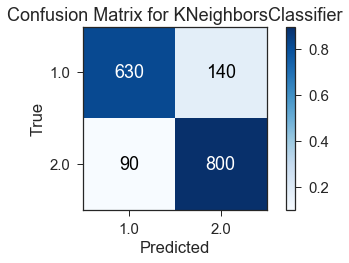

In [50]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

In [35]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.8333
              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.86      0.83      0.84        23

    accuracy                           0.83        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.83      0.83      0.83        42



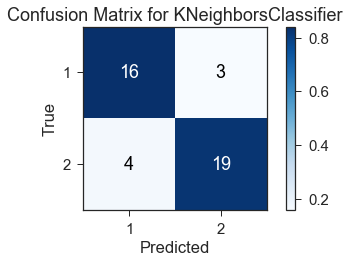

In [51]:
#  Fitting on the training data
KNN = classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [37]:
from time import time

In [38]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 39.657534 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.796 (+/- 0.075)
The IQR is 0.118 between [0.71,0.82]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.82      0.71      0.76       770
         2.0       0.78      0.87      0.82       890

    accuracy                           0.80      1660
   macro avg       0.80      0.79      0.79      1660
weighted avg       0.80      0.80      0.79      1660

The average training time is 0.008700 seconds


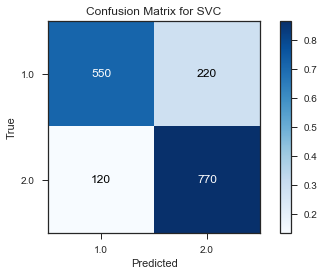

In [39]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C'],
                                                                        gamma = grid_search_L.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [40]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.6867469879518072 {'C': 0.03125, 'gamma': 3.0517578125e-05}
0.6867469879518072 {'C': 0.03125, 'gamma': 6.103515625e-05}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.0001220703125}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.000244140625}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.00048828125}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.0009765625}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.001953125}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.00390625}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.0078125}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.015625}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.03125}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.0625}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.125}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.25}
0.6867469879518072 {'C': 0.03125, 'gamma': 0.5}
0.6867469879518072 {'C': 0.03125, 'gamma': 1.0}
0.6867469879518072 {'C': 0.03125, 'gamma': 2.0}
0.6867469879518072 {'C': 0.03125, 'gamma': 4.0}
0.6867469879518072 {'C': 0.03125,

The test accuracy is 0.7619
              precision    recall  f1-score   support

           1       0.85      0.71      0.77        24
           2       0.68      0.83      0.75        18

    accuracy                           0.76        42
   macro avg       0.77      0.77      0.76        42
weighted avg       0.78      0.76      0.76        42



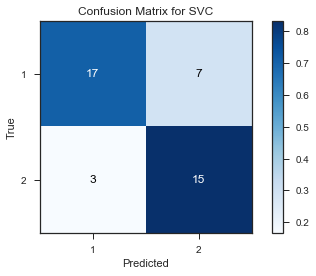

In [41]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'], 
                          gamma = grid_search_L.best_params_['gamma'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [42]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 22.867951 seconds


C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The model score is 0.897 (+/- 0.078)
The IQR is 0.118 between [0.82,0.94]
There is 0 deleted rows
              precision    recall  f1-score   support

         1.0       0.93      0.84      0.88       770
         2.0       0.88      0.94      0.91       890

    accuracy                           0.90      1660
   macro avg       0.90      0.89      0.90      1660
weighted avg       0.90      0.90      0.90      1660

The average training time is 0.006470 seconds


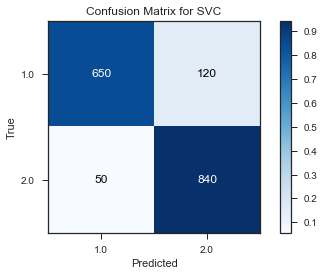

In [43]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 0.9048
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       0.91      0.91      0.91        22

    accuracy                           0.90        42
   macro avg       0.90      0.90      0.90        42
weighted avg       0.90      0.90      0.90        42



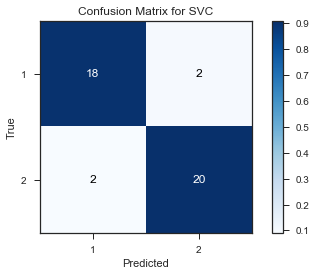

In [44]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

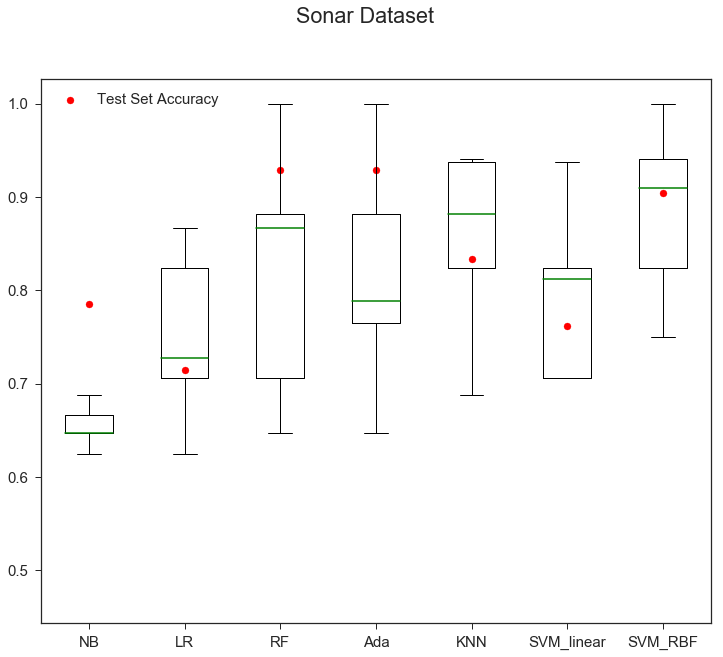

In [52]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,10))
fig.suptitle('Sonar Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend()
plt.show()


In [46]:
test_results

[0.7857142857142857,
 0.7142857142857143,
 0.9285714285714286,
 0.9285714285714286,
 0.7619047619047619,
 0.7619047619047619,
 0.9047619047619048]